In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
sns.set(rc={'figure.figsize':(50,50)})
sns.set_style('whitegrid')

In [8]:
ps = pd.read_csv('vasan_spike_CA_only.pdb', delim_whitespace=True)

In [16]:
! pip install biopandas

     |████████████████████████████████| 264 kB 492 kB/s            


In [18]:
ps.head()

CRYST1 160.000 160.000.1  198.248   90.00  90.00.1  90.00.2    P  \
ATOM 1.0     CA     ALA         A     27.0 -40.708   39.016   17.777  1.0   
     2.0     CA     TYR         A     28.0 -38.170   37.168   15.487  1.0   
     3.0     CA     THR         A     29.0 -35.589   38.277   12.971  1.0   
     4.0     CA     ASN         A     30.0 -32.950   36.855   10.583  1.0   
     5.0     CA     SER         A     31.0 -29.454   36.557   12.048  1.0   

             1 1.1  
ATOM 1.0  1.00   A  
     2.0  1.00   A  
     3.0  1.00   A  
     4.0  1.00   A  
     5.0  1.00   A

In [54]:
data = pd.read_csv('vasan_CAonly_Cchain.txt', delim_whitespace=True)

In [55]:
data.head()

,Node,Degree,Cluster_Coeff,Closeness,Betweenness,Eigenvector_centrality,Eccentricity,Average_neighbor_degree
0,C27,5,0.700000,0.054222,0.000156,0.0,37,7.800000
1,C28,6,0.733333,0.056463,0.001161,0.0,36,8.500000
2,C29,8,0.500000,0.059203,0.031677,0.0,35,8.125000
3,C30,7,0.666667,0.059019,0.000295,0.0,35,8.571428
4,C31,10,0.488889,0.061985,0.116040,0.0,34,8.200000


In [56]:
data.dtypes

Node                        object
Degree                       int64
Cluster_Coeff              float64
Closeness                  float64
Betweenness                float64
Eigenvector_centrality     float64
Eccentricity                 int64
Average_neighbor_degree    float64
dtype: object

In [57]:
data['Node'] = data['Node'].astype('str').str[1:]

In [58]:
data['Node'] = data['Node'].astype('int64')

In [59]:
data.index = data['Node']

In [60]:
data.head()

,Node,Degree,Cluster_Coeff,Closeness,Betweenness,Eigenvector_centrality,Eccentricity,Average_neighbor_degree
Node,,,,,,,,
27,27,5,0.700000,0.054222,0.000156,0.0,37,7.800000
28,28,6,0.733333,0.056463,0.001161,0.0,36,8.500000
29,29,8,0.500000,0.059203,0.031677,0.0,35,8.125000
30,30,7,0.666667,0.059019,0.000295,0.0,35,8.571428
31,31,10,0.488889,0.061985,0.116040,0.0,34,8.200000


In [62]:
data

,Node,Degree,Cluster_Coeff,Closeness,Betweenness,Eigenvector_centrality,Eccentricity,Average_neighbor_degree
Node,,,,,,,,
27,27,5,0.700000,0.054222,0.000156,0.000000,37,7.800000
28,28,6,0.733333,0.056463,0.001161,0.000000,36,8.500000
29,29,8,0.500000,0.059203,0.031677,0.000000,35,8.125000
30,30,7,0.666667,0.059019,0.000295,0.000000,35,8.571428
31,31,10,0.488889,0.061985,0.116040,0.000000,34,8.200000
...,...,...,...,...,...,...,...,...
1143,1143,5,0.900000,0.047992,0.000001,0.000146,38,6.000000
1144,1144,5,0.900000,0.047992,0.000001,0.000146,38,6.000000
1145,1145,6,0.666667,0.047995,0.001912,0.000149,38,5.166667


In [63]:
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [64]:
2

2

In [65]:
data_scaled_crop = data_scaled.iloc[400:700]

In [67]:
data_scaled_crop

,Node,Degree,Cluster_Coeff,Closeness,Betweenness,Eigenvector_centrality,Eccentricity,Average_neighbor_degree
400,0.357143,0.363636,0.520000,0.263268,0.003427,0.000000,0.72,0.412229
401,0.358036,0.181818,0.600000,0.309961,0.011775,0.000000,0.68,0.520710
402,0.358929,0.636364,0.300000,0.313215,0.078513,0.000000,0.68,0.470085
403,0.359821,0.545455,0.357143,0.361897,0.056055,0.000000,0.64,0.585799
404,0.360714,0.727273,0.360000,0.365125,0.042773,0.000000,0.64,0.676923
...,...,...,...,...,...,...,...,...
695,0.620536,0.636364,0.300000,0.561478,0.050061,0.498694,0.48,0.817226
696,0.621429,0.363636,0.520000,0.564474,0.271250,0.397979,0.48,0.781065
697,0.622321,0.545455,0.528571,0.515534,0.039797,0.595185,0.52,0.748521
698,0.623214,0.454545,0.542857,0.520777,0.241602,0.551041,0.52,0.715976


In [68]:
data_scaled_crop.sort_values("Degree").iloc[1:20]

,Node,Degree,Cluster_Coeff,Closeness,Betweenness,Eigenvector_centrality,Eccentricity,Average_neighbor_degree
419,0.374107,0.090909,1.0,0.103820,0.000000,0.000000,0.88,0.368836
659,0.588393,0.090909,0.6,0.633713,0.003159,0.000000,0.24,0.108481
672,0.600000,0.090909,0.6,0.920741,0.145058,0.000000,0.00,0.542406
657,0.586607,0.090909,0.6,0.471914,0.000011,0.000000,0.32,0.065089
674,0.601786,0.090909,0.6,0.855995,0.001867,0.000002,0.08,0.065089
505,0.450893,0.090909,0.6,0.552930,0.000283,0.000000,0.48,0.238659
678,0.605357,0.090909,0.6,0.807675,0.001224,0.000037,0.16,0.065089
630,0.562500,0.090909,0.6,0.800625,0.000188,0.000000,0.08,0.282051
680,0.607143,0.090909,0.6,0.783812,0.001130,0.000482,0.20,0.108481
431,0.384821,0.090909,0.6,0.103768,0.000006,0.000000,0.88,0.108481


In [69]:
data_scaled_crop.sort_values("Betweenness").iloc[1:20]

,Node,Degree,Cluster_Coeff,Closeness,Betweenness,Eigenvector_centrality,Eccentricity,Average_neighbor_degree
419,0.374107,0.090909,1.000000,0.103820,0.000000,0.0,0.88,0.368836
576,0.514286,0.181818,1.000000,0.765683,0.000000,0.0,0.24,0.488166
555,0.495536,0.090909,1.000000,0.491620,0.000000,0.0,0.52,0.412229
542,0.483929,0.181818,0.800000,0.502621,0.000001,0.0,0.48,0.390533
543,0.484821,0.181818,0.800000,0.502415,0.000001,0.0,0.48,0.325444
456,0.407143,0.181818,0.800000,0.000000,0.000003,0.0,1.00,0.195266
431,0.384821,0.090909,0.600000,0.103768,0.000006,0.0,0.88,0.108481
657,0.586607,0.090909,0.600000,0.471914,0.000011,0.0,0.32,0.065089
602,0.537500,0.181818,0.400000,0.435474,0.000015,0.0,0.44,0.130178
473,0.422321,0.181818,0.600000,0.105886,0.000025,0.0,0.88,0.488166


In [71]:
data_scaled_crop.sort_values("Eigenvector_centrality").iloc[1:10]

,Node,Degree,Cluster_Coeff,Closeness,Betweenness,Eigenvector_centrality,Eccentricity,Average_neighbor_degree
574,0.512500,0.636364,0.300000,0.873738,0.005218,0.0,0.20,0.368836
575,0.513393,0.545455,0.271428,0.842824,0.006765,0.0,0.20,0.276627
576,0.514286,0.181818,1.000000,0.765683,0.000000,0.0,0.24,0.488166
577,0.515179,0.272727,0.760000,0.813667,0.000293,0.0,0.20,0.455621
578,0.516071,0.454545,0.371428,0.816327,0.001202,0.0,0.20,0.325444
579,0.516964,0.181818,0.400000,0.804447,0.001816,0.0,0.24,0.455621
580,0.517857,0.272727,0.160000,0.848325,0.010712,0.0,0.20,0.533728
581,0.518750,0.545455,0.314285,0.913045,0.023361,0.0,0.20,0.699704
582,0.519643,0.727273,0.306666,0.916583,0.034326,0.0,0.20,0.859172


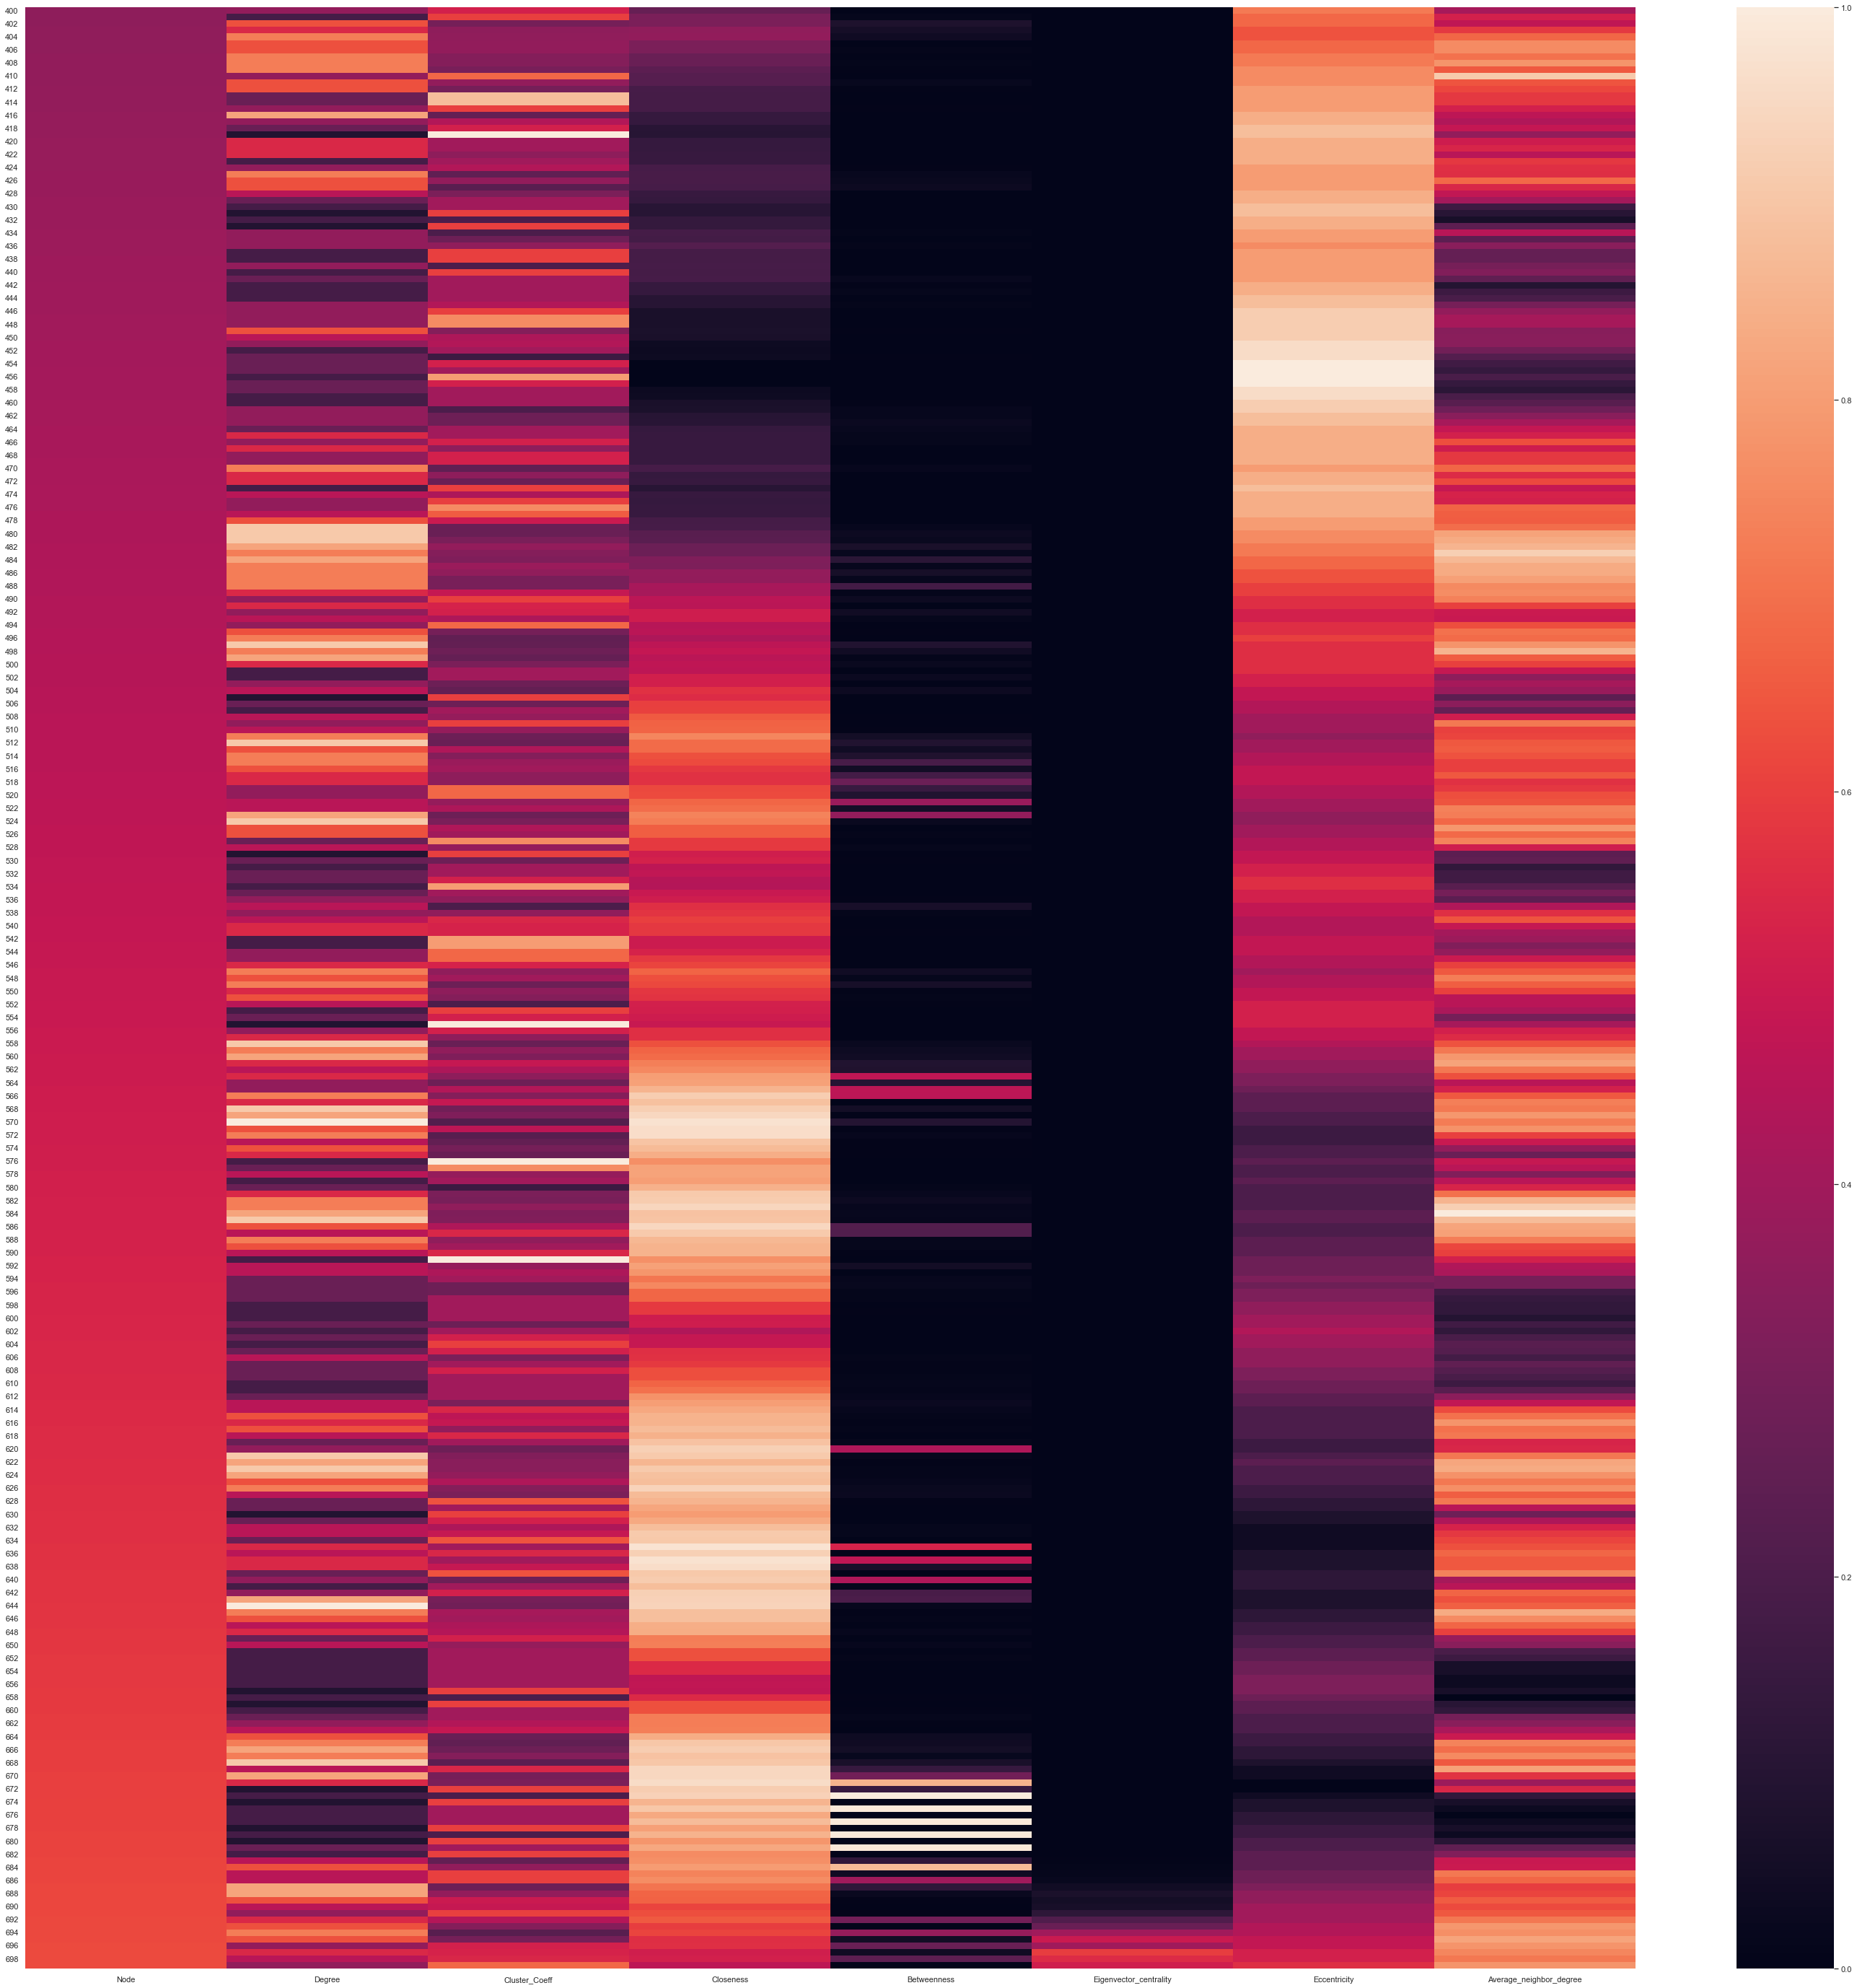

In [78]:
hm = sns.heatmap(data_scaled_crop)
figure = hm.get_figure()    
figure.savefig('heatmap_scaled.png', dpi=400)

In [73]:
data.describe()

,Node,Degree,Cluster_Coeff,Closeness,Betweenness,Eigenvector_centrality,Eccentricity,Average_neighbor_degree
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,587.000000,7.289920,0.533127,0.052243,0.034784,0.063147,38.861731,7.669678
std,323.749131,2.262421,0.134426,0.008813,0.103571,0.165032,5.264908,1.519446
min,27.000000,2.000000,0.166667,0.035002,0.000000,0.000000,25.000000,3.500000
25%,307.000000,6.000000,0.444444,0.045696,0.001703,0.000000,35.000000,6.714286
50%,587.000000,7.000000,0.500000,0.051435,0.007019,0.000000,39.000000,8.000000
75%,867.000000,9.000000,0.619048,0.057581,0.021387,0.020267,43.000000,8.750000
max,1147.000000,13.000000,1.000000,0.073723,1.000000,1.000000,50.000000,11.181818


In [74]:
data.iloc[474]

Node                       501.000000
Degree                       7.000000
Cluster_Coeff                0.523810
Closeness                    0.040602
Betweenness                  0.001173
Eigenvector_centrality       0.000000
Eccentricity                46.000000
Average_neighbor_degree      7.571429
Name: 501, dtype: float64

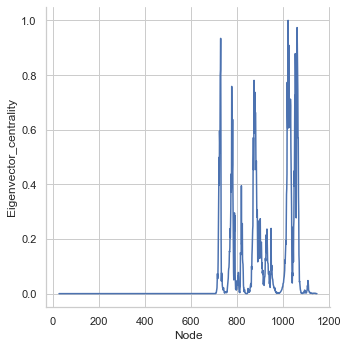

In [86]:
sns.relplot(x='Node', y='Eigenvector_centrality',kind='line', data=data)

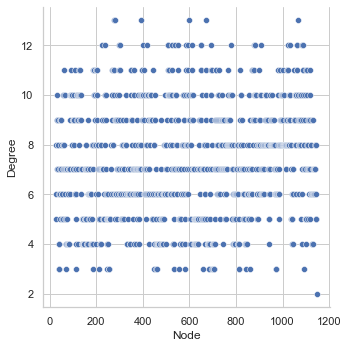

In [79]:
sns.relplot(x='Node', y='Degree', data=data)

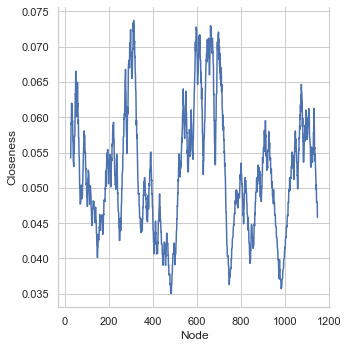

In [80]:
sns.relplot(x='Node', y='Closeness', kind='line',data=data)

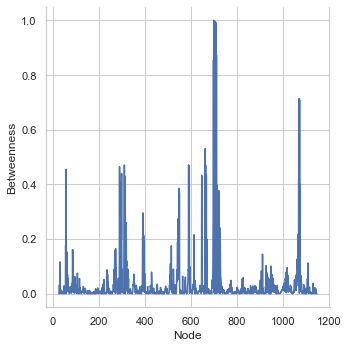

In [81]:
sns.relplot(x='Node', y='Betweenness',kind='line', data=data)

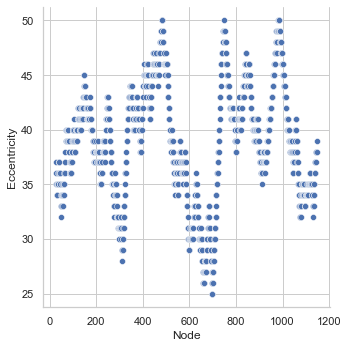

In [82]:
sns.relplot(x='Node', y='Eccentricity', data=data)

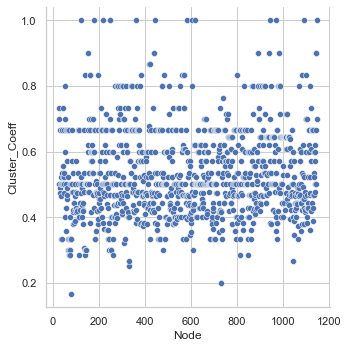

In [85]:
sns.relplot(x='Node', y='Cluster_Coeff', data=data)